In [2]:
import os
import zipfile
zip_path = '/content/Files.zip'
extract_path = '/content'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
import os

dataset_path = '/content/CNN_dataset'

categories = os.listdir(dataset_path)
for category in categories:
    category_path = os.path.join(dataset_path, category)
    num_images = len(os.listdir(category_path))
    print(f"Category: {category}, Number of Images: {num_images}")

Category: HeadCT, Number of Images: 1000
Category: CXR, Number of Images: 1000
Category: ChestCT, Number of Images: 1000
Category: Hand, Number of Images: 1000
Category: AbdomenCT, Number of Images: 1000


In [4]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Create training and validation datasets
train_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    dataset_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [14]:
import os
import shutil
from sklearn.model_selection import train_test_split

dataset_dir = '/content/CNN_dataset'
test_dir = '/content/test'

# test folder
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

for category in os.listdir(dataset_dir):
    category_path = os.path.join(dataset_dir, category)
    test_category_path = os.path.join(test_dir, category)

    if not os.path.exists(test_category_path):
        os.makedirs(test_category_path)

    image_files = [os.path.join(category_path, f) for f in os.listdir(category_path) if os.path.isfile(os.path.join(category_path, f))]

    # Split into train (80%) and test (20%)
    train_files, test_files = train_test_split(image_files, test_size=0.2, random_state=42)

    # images stored for testing
    for test_file in test_files:
        shutil.move(test_file, test_category_path)

data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_data = data_gen.flow_from_directory(
    dataset_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 2560 images belonging to 5 classes.
Found 640 images belonging to 5 classes.


In [15]:
train_class_counts = np.sum(train_data.classes)
val_class_counts = np.sum(val_data.classes)

print(f"Training Class Distribution: {train_class_counts}")
print(f"Validation Class Distribution: {val_class_counts}")

Training Class Distribution: 5120
Validation Class Distribution: 1280


In [17]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [19]:
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 73s 906ms/step - accuracy: 0.9066 - loss: 0.2386 - val_accuracy: 0.9906 - val_loss: 0.1419
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.9832 - loss: 0.0597 - val_accuracy: 0.9797 - val_loss: 0.1238
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 77s 966ms/step - accuracy: 0.9917 - loss: 0.0329 - val_accuracy: 0.9891 - val_loss: 0.0818
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 70s 873ms/step - accuracy: 0.9939 - loss: 0.0264 - val_accuracy: 0.9922 - val_loss: 0.0650
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 81s 867ms/step - accuracy: 0.9961 - loss: 0.0190 - val_accuracy: 0.9937 - val_loss: 0.0675
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 74s 924ms/step - accuracy: 0.9967 - loss: 0.0127 - val_accuracy: 0.9828 - val_loss: 0.0883
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 77s 867ms/step - accuracy: 0.9970 - loss: 0.0156 - val_accuracy: 0.9797 - val_loss: 0.1020
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 83s 875ms/step - accuracy: 0.9972 - loss: 0.0090 - val_accurac

In [20]:
val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 281ms/step - accuracy: 0.9872 - loss: 0.0977
Validation Loss: 0.09911095350980759
Validation Accuracy: 0.989062488079071


In [21]:
test_data_gen = ImageDataGenerator(rescale=1./255)

test_data = test_data_gen.flow_from_directory(
    '/content/test',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_loss, test_accuracy = model.evaluate(test_data)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 1800 images belonging to 5 classes.
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 239ms/step - accuracy: 0.9938 - loss: 0.0432
Test Loss: 0.03309787064790726
Test Accuracy: 0.9938889145851135


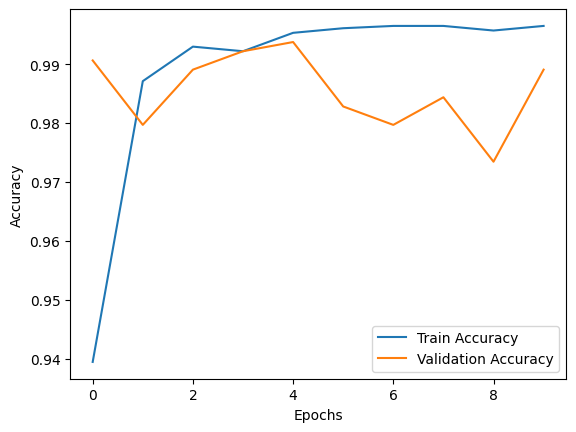

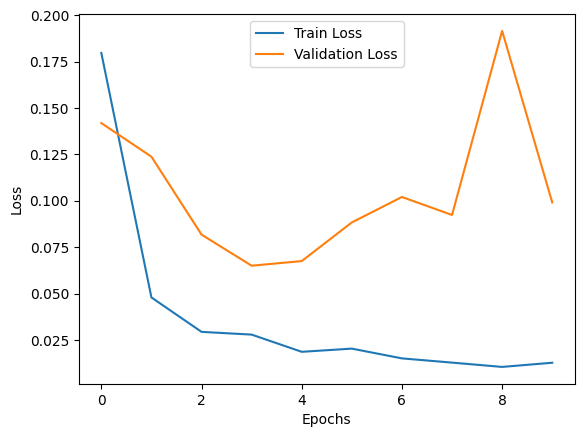

In [22]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


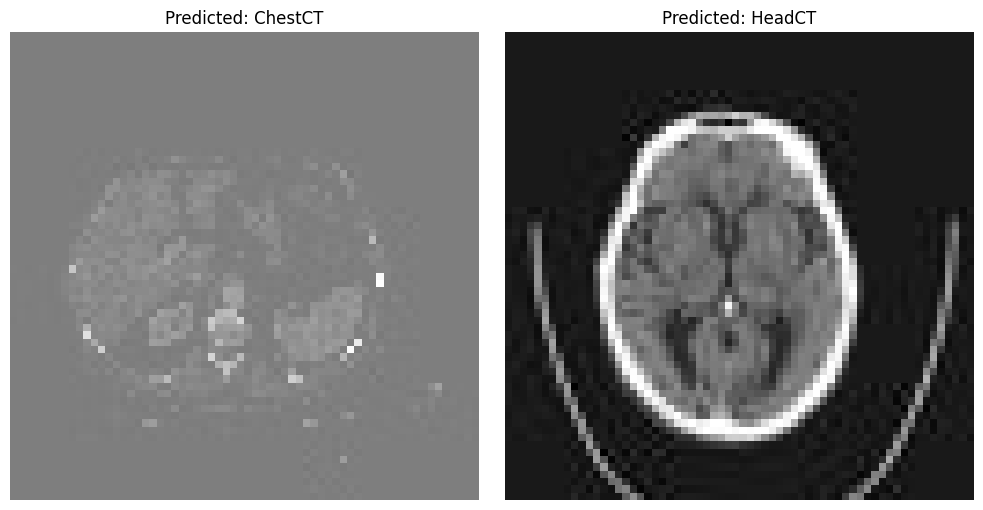

In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

image_paths = [
    '/content/CNN_dataset/ChestCT/000000.jpeg',
    '/content/CNN_dataset/HeadCT/000000.jpeg',
]

class_names = list(train_data.class_indices.keys())  # Assuming train_data is already defined
plt.figure(figsize=(15, 10))

for i, img_path in enumerate(image_paths):

    # Load and preprocess image
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Predict the class
    predictions = model.predict(img_array)
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]

    # Plot the image with the predicted label
    plt.subplot(2, 3, i + 1)
    plt.imshow(image.load_img(img_path))
    plt.title(f"Predicted: {predicted_class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()
